<a href="https://colab.research.google.com/github/prateekkosta/Customer-Sales-Analysis-Dashbord-in-Power-BI/blob/main/Retail_Data_Cleaning_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective**- Perform EDA to find out how many customers are happy with the product and service provided by the retail company.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading Data**

In [2]:
dirty_data= pd.read_csv('dirty_data.csv')
dirty_data.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,22/06/2019,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200.0,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,29/12/2019,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080.0,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,02/03/2019,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670.0,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,12/01/2019,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800.0,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,28/11/2019,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145.0,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True


Get The Description of Data

In [3]:
dirty_data.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,distance_to_nearest_warehouse
count,498.000000,496.000000,500.000000,500.000000,500.000000,500.000000
mean,25585.387550,76.679819,-35.835234,144.969494,10.890000,2.204224
std,86501.420493,14.529621,12.045393,0.022720,8.649134,8.812416
min,585.000000,46.350000,-37.827123,144.924967,0.000000,0.107800
25%,7050.000000,65.892500,-37.818222,144.953488,5.000000,0.751425
50%,12865.000000,76.335000,-37.812165,144.965357,10.000000,1.030100
75%,20360.000000,82.817500,-37.805364,144.983985,15.000000,1.408625
max,947691.000000,114.040000,37.826339,145.019837,25.000000,94.973400


In [4]:
# Shape of the Data
print('Shape of the Dirty data=', dirty_data.shape)

Shape of the Dirty data= (500, 16)


Checking Null values

In [5]:
# check for null values
print(dirty_data.isnull().sum())

order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      2
delivery_charges                 4
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           0
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           0
is_happy_customer                4
dtype: int64


**Box Plot for Checking Ouliers with missing values**

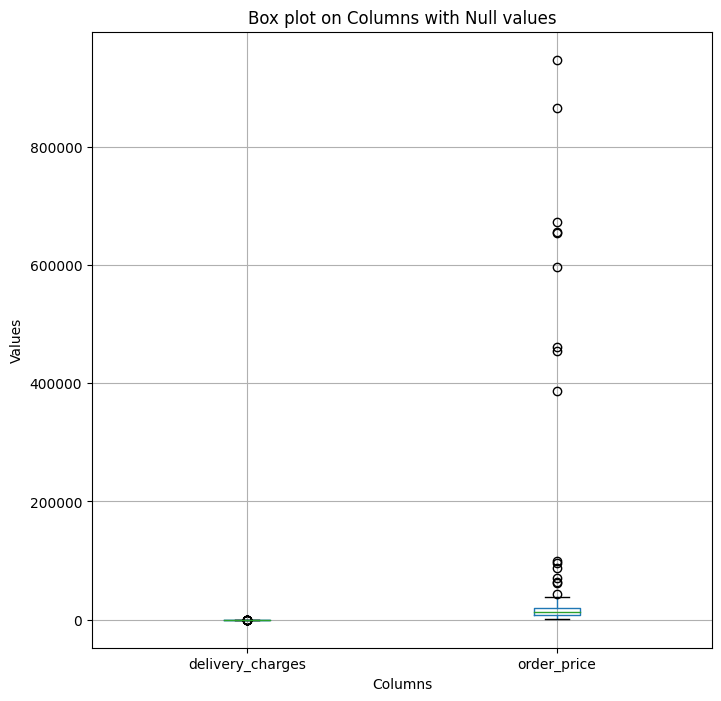

In [6]:
plt.figure(figsize=(8,8))
dirty_data.boxplot(column=['delivery_charges', 'order_price'])
plt.title('Box plot on Columns with Null values')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

**Replacing of Null Values with Mean, Median and Mode**

In [7]:
# replacing null values of Delivery Charges with mean

dirty_data['delivery_charges'].fillna(dirty_data['delivery_charges'].mean(), inplace= True)

In [8]:
# replacing null values of Order Price with Median because it has multiple outliers

dirty_data['order_price'].fillna(dirty_data['order_price'].median(), inplace= True)

In [9]:
# replacing null values of Is Happy Customer column with Mode because binary balue columns are replaced with mode

dirty_data['is_happy_customer'].fillna(dirty_data['is_happy_customer'].mode()[0], inplace= True)

In [10]:
dirty_data['is_happy_customer'].mode()

0    True
Name: is_happy_customer, dtype: bool

In [11]:
# again checking for null values

print(dirty_data.isnull().sum())

order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      0
delivery_charges                 0
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           0
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           0
is_happy_customer                0
dtype: int64


In [12]:
# checking the data type

print(dirty_data.dtypes)



order_id                          object
customer_id                       object
date                              object
nearest_warehouse                 object
shopping_cart                     object
order_price                      float64
delivery_charges                 float64
customer_lat                     float64
customer_long                    float64
coupon_discount                    int64
order_total                       object
season                            object
is_expedited_delivery               bool
distance_to_nearest_warehouse    float64
latest_customer_review            object
is_happy_customer                   bool
dtype: object


Conversion of Datatype

In [13]:

# Converting Date column into Date time format

dirty_data.date= pd.to_datetime(dirty_data['date'])

<ipython-input-13-ced641ea8b38>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dirty_data.date= pd.to_datetime(dirty_data['date'])


In [14]:
print(dirty_data['date'].dtypes)

datetime64[ns]


**Sanity Check Of Data**

In [15]:
# Cheking for Unique Data in Order ID column

if dirty_data.order_id.is_unique:
  print('Data in Order Id is Unique.')
else:
  print('Data in Order Id in not Unique.')

Data in Order Id is Unique.


In [19]:
# checking for unique values in Column

dirty_data['nearest_warehouse'].unique()

array(['Thompson', 'Nickolson', 'Bakers', 'nickolson', 'thompson',
       'Thompson911', '1211Bakers', 'Nick123olson'], dtype=object)

In [21]:
# using Regular Expression for cleaning the data

pattern= '\d+' #matches one or more digits
masked = dirty_data['nearest_warehouse'].str.contains(pattern, regex= True)
result = dirty_data[masked]
result

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
426,ORD057375,ID0710001161,2019-03-02,Thompson911,"[('Thunder line', 1), ('Alcon 10', 1), ('Candl...",18460.0,93.52,-37.813736,144.936811,25,665085.66,Summer,True,0.9098,best buy i've made on digico functions properl...,True
467,ORD144784,ID0333901582,2019-09-11,1211Bakers,"[('Olivia x460', 2), ('Lucent 330S', 2)]",4910.0,108.87,-37.801844,144.981358,25,3791.37,Autumn,True,1.5207,turned our old tv into a smart tv. really easy...,True
494,ORD379700,ID2190564628,2019-05-08,Nick123olson,"[('Candle Inferno', 1), ('Alcon 10', 1), ('Luc...",17510.0,75.37,-37.816209,144.964057,5,16709.87,Winter,True,0.5513,"good quality price ratio bought it for my mom,...",True


In [23]:
# replacing data
dirty_data['nearest_warehouse']= dirty_data['nearest_warehouse'].str.replace('\d+', '')
dirty_data.head()

<ipython-input-23-a282e3ddcfda>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dirty_data['nearest_warehouse']= dirty_data['nearest_warehouse'].str.replace('\d+', '')


,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200.0,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080.0,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-02-03,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670.0,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-12-01,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800.0,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145.0,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True


In [24]:
# corrected Data
dirty_data['nearest_warehouse'].unique()

array(['Thompson', 'Nickolson', 'Bakers', 'nickolson', 'thompson'],
      dtype=object)

In [30]:
# Checking unique values in Order Total column

dirty_data['order_total'].unique()

array(['1105989', '914271', '966887', '2113761', '693429', '710022',
       '1308984', '1078979', '2295858', '1138426', '3197325', '1046479',
       '92605725', '1978564', '3197978', '1519635', '1118819', '130452',
       '626889', '629486', '1378761', '482305', '1711101', '546428',
       '1753919', '227398', '2034604', '566328', '171418', '1962668',
       '1228724', '40230725', '790074', '1698954', '1916109', '328044',
       '1018645', '1282212', '1162028', '1307521', '571779', '6205023',
       '843745', '813157', '1382201', '744601', '105983', '883633',
       '2819573', '1942081', '797782', '999906', '234686', '1542105',
       '230295', '4140693', '447072', '2230628', '357902', '1516821',
       '70366', '3721532', '179732', '148458', '537913', '1656247',
       '511447', '1831614', '961979', '1836762', '168037', '2661653',
       '88026', '2429323', '391342', '1221093', '269006', '2805618',
       '3175808', '913423', '341642', '39376123', '1464658', '783323',
       '449022',

In [27]:
pattern= '[a-zA-Z\W]'
masked= dirty_data['order_total'].str.contains(pattern, regex= True)
result= dirty_data[masked]
result

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200.0,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080.0,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-02-03,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670.0,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-12-01,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800.0,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145.0,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD475510,ID0247417082,2019-07-08,Nickolson,"[('Alcon 10', 2), ('iAssist Line', 2)]",386776.0,59.70,-37.817662,144.970405,10,20174.7,Winter,True,0.1282,i bought this phone to send to my sister in .....,False
496,ORD086060,ID0130015098,2019-03-28,Nickolson,"[('pearTV', 2), ('Candle Inferno', 2), ('Toshi...",22120.0,62.29,-37.815469,144.968083,0,22182.29,Autumn,True,0.3711,one star it was the wrong phone,False
497,ORD079320,ID2707985442,2019-10-16,Nickolson,"[('pearTV', 1), ('Alcon 10', 1), ('Lucent 330S...",16490.0,106.98,-37.805979,144.966101,0,16596.98,Spring,True,1.4368,love this phone! has many great features!,True
498,ORD026546,ID0060088412,2019-05-19,Nickolson,"[('iStream', 1), ('Candle Inferno', 1), ('iAss...",5030.0,79.89,37.820071,144.984435,10,4606.89,Autumn,True,1.3191,spoiled son's birthday present son wanted one ...,True


In [28]:
# Replacing anything from column containing ALphabet or special character.
dirty_data['order_total']= dirty_data['order_total'].str.replace('[a-zA-Z\W]', '')


<ipython-input-28-f90ff9c9899a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dirty_data['order_total']= dirty_data['order_total'].str.replace('[a-zA-Z\W]', '')


In [31]:
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       500 non-null    object        
 1   customer_id                    500 non-null    object        
 2   date                           500 non-null    datetime64[ns]
 3   nearest_warehouse              500 non-null    object        
 4   shopping_cart                  500 non-null    object        
 5   order_price                    500 non-null    float64       
 6   delivery_charges               500 non-null    float64       
 7   customer_lat                   500 non-null    float64       
 8   customer_long                  500 non-null    float64       
 9   coupon_discount                500 non-null    int64         
 10  order_total                    500 non-null    object        
 11  season             